In [1267]:
## MANE 4962 Homework 3 Question 2
# Load Modules
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

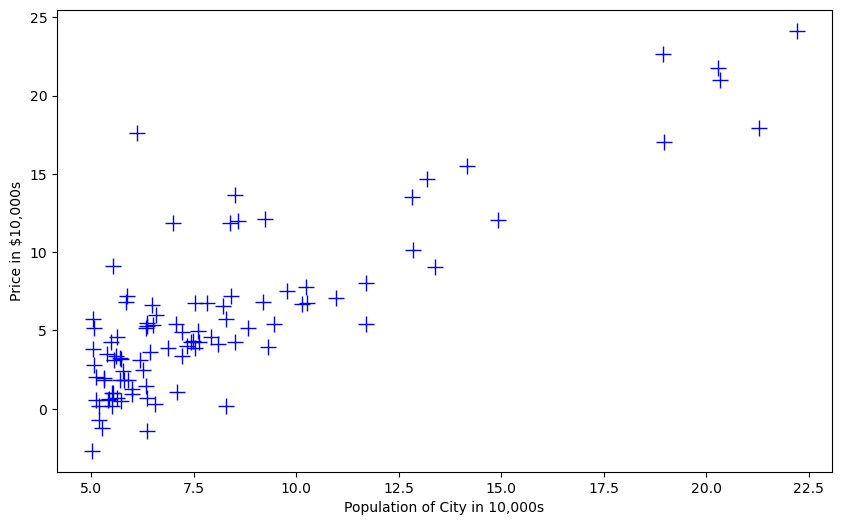

In [1268]:
""" Open Data from source """
# Load Data and Visualize Data (Code from HW3 Dataloader)
datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'b+',markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')
plt.show()

In [1269]:
# Model
def h(w,X):
    return np.dot(X,w)

# Error Function
def mse(w,X,y):
    return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))

In [1270]:
# Function to create mini-batches
def create_mini_batches(X, y, batch_size):

    if X.shape[0] != y.shape[0]:
        print("Amount of Data in X is not the same as the amount of data in y")
        
    # Re-arrange data
    X_data = np.reshape(X[:,1], (X.shape[0],1))
    # Random Shuffle the Data
    data = np.hstack((X_data, y))
    data_rando = np.random.permutation(data)

    # Re-seperate and re-shape X and y data
    X_data_rand = np.reshape(data_rando[:,0], (data_rando.shape[0], 1))
    X_data_rand = np.insert(X_data_rand, 0, 1, axis = 1)
    y_data_rand = np.reshape(data_rando[:,1], (data_rando.shape[0], 1))

    # Create Mini-Batches
    X_mini = X_data_rand[0:batch_size]
    y_mini = y_data_rand[0:batch_size]
    
    return X_mini, y_mini

In [1271]:
# Gradient Descent Method
def gradient_descend(X, y, batch_size, w_start = np.zeros(2)):
    w = w_start
    J_values = []
    w_store = []
    for _ in range(iterations):
        temp_w = w

        # Mini-batches
        X_mini, y_mini = create_mini_batches(X, y, batch_size)
        m = y_mini.shape[0]
        
        J_values.append(mse(w, X_mini, y_mini))
        w_store.append(list(w[:,0]))
        
        for j in range(len(temp_w)):
            temp_w[j] = w[j] - (alpha/m)*np.sum((h(w,X_mini) - y_mini)*np.array(X_mini[:,j]).reshape(m,1))
                
        w = temp_w
            
    return w, w_store, J_values

In [1272]:
def predict(xval):
    return w[0] + w[1]*xval

In [1273]:
# Test Code for creating mini_batches
# Comment out 
# X_batch, y_batch, n = create_mini_batches(X, y, 5)

# display(X_batch)
# display(y_batch)

C:\Users\calvi\AppData\Local\Temp\ipykernel_15496\2106477981.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))
C:\Users\calvi\AppData\Local\Temp\ipykernel_15496\2217607154.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))


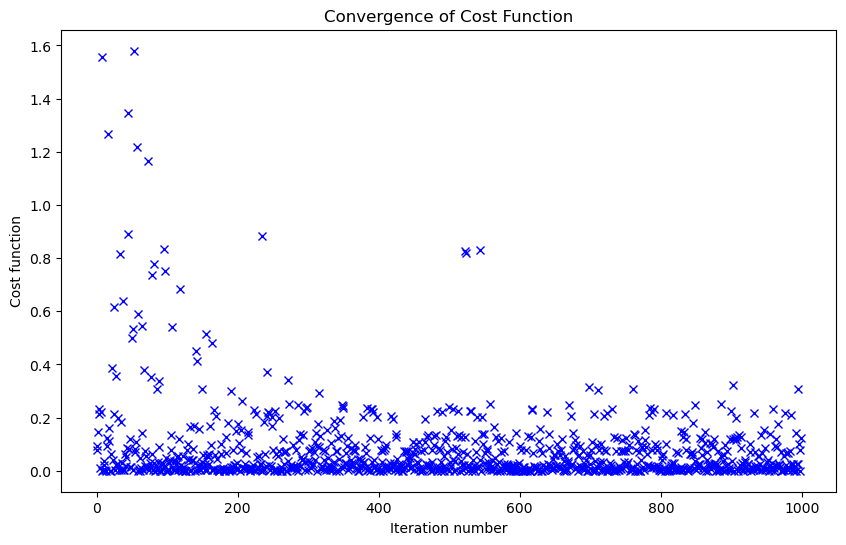

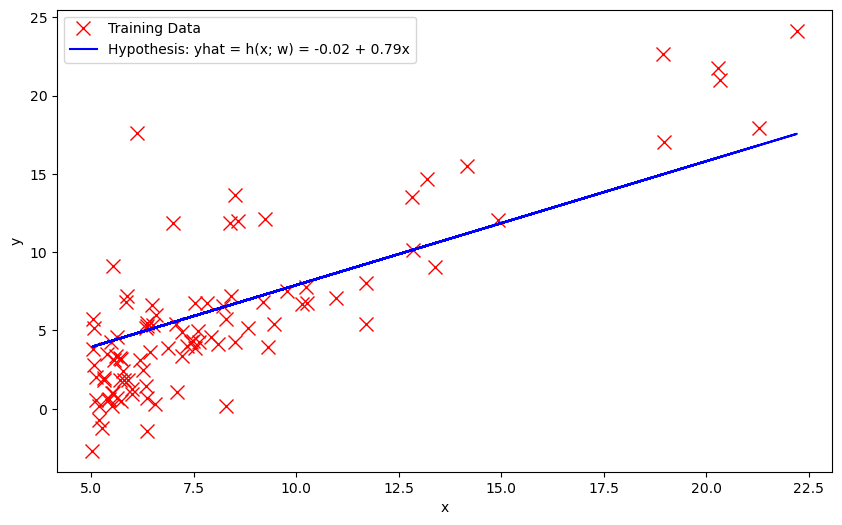

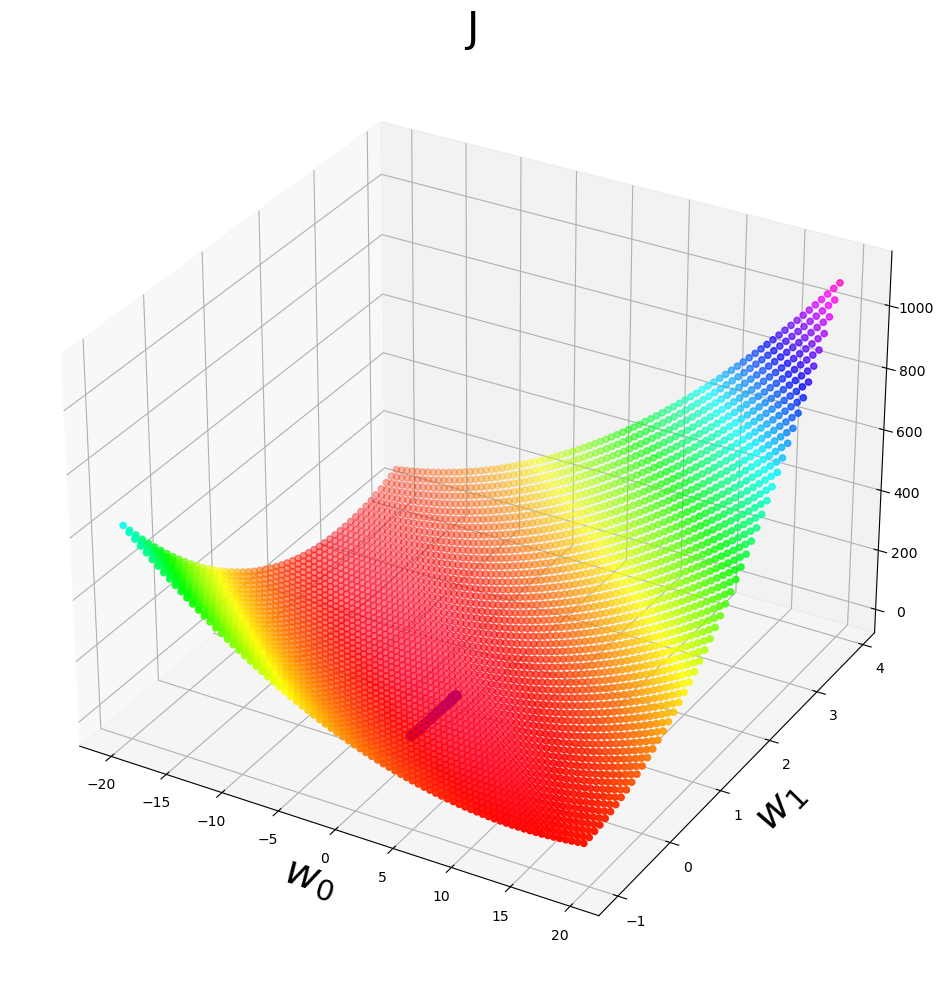

In [1274]:
iterations = 1000
alpha = 0.0001 # learning rate
batch_size = 1 # batch_size

w_start = np.zeros((X.shape[1], 1))
w, w_store, J_values = gradient_descend(X, y, batch_size, w_start)

plt.figure(figsize=(10,6))
plt.plot(range(len(J_values)),J_values,'bx')
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")


plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))

plt.ylabel('y')
plt.xlabel('x')
plt.legend()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection = '3d')
ax = fig.gca()

xvals = np.arange(-20,20,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for _ in xvals:
    for _k in yvals:
        myxs.append(_)
        myys.append(_k)
        myzs.append(mse(np.array([[_], [_k]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('gist_rainbow'))

plt.xlabel(r'$w_0$',fontsize=30)
plt.ylabel(r'$w_1$',fontsize=30)
plt.title('J',fontsize=30)
plt.plot([x[0] for x in w_store],[x[1] for x in w_store],J_values,'bo-')
plt.show()

C:\Users\calvi\AppData\Local\Temp\ipykernel_15496\2106477981.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))
C:\Users\calvi\AppData\Local\Temp\ipykernel_15496\3692470949.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))


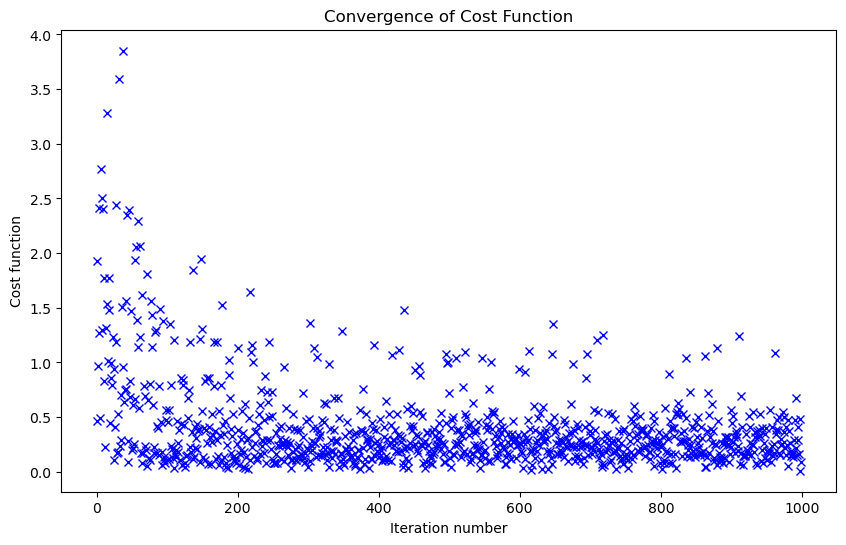

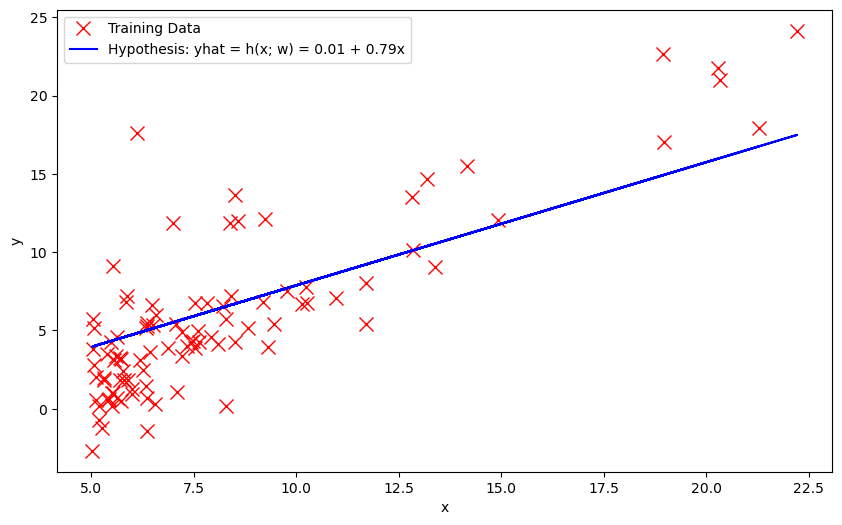

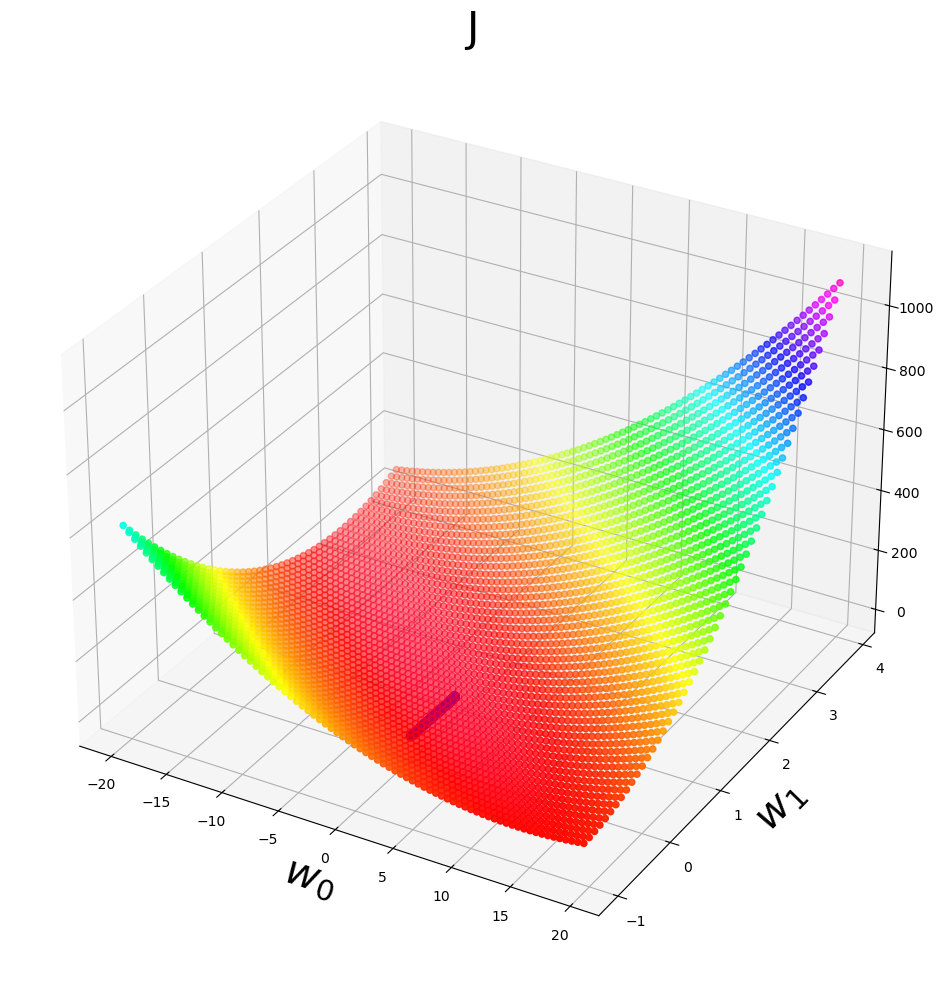

In [1275]:
iterations = 1000
alpha = 0.0001 # learning rate
batch_size = 5 # batch_size

w_start = np.zeros((X.shape[1], 1))
w, w_store, J_values = gradient_descend(X, y, batch_size, w_start)

plt.figure(figsize=(10,6))
plt.plot(range(len(J_values)),J_values,'bx')
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")


plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))

plt.ylabel('y')
plt.xlabel('x')
plt.legend()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection = '3d')
ax = fig.gca()

xvals = np.arange(-20,20,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for _ in xvals:
    for _k in yvals:
        myxs.append(_)
        myys.append(_k)
        myzs.append(mse(np.array([[_], [_k]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('gist_rainbow'))

plt.xlabel(r'$w_0$',fontsize=30)
plt.ylabel(r'$w_1$',fontsize=30)
plt.title('J',fontsize=30)
plt.plot([x[0] for x in w_store],[x[1] for x in w_store],J_values,'bo-')
plt.show()

C:\Users\calvi\AppData\Local\Temp\ipykernel_15496\2106477981.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))
C:\Users\calvi\AppData\Local\Temp\ipykernel_15496\1455678600.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))


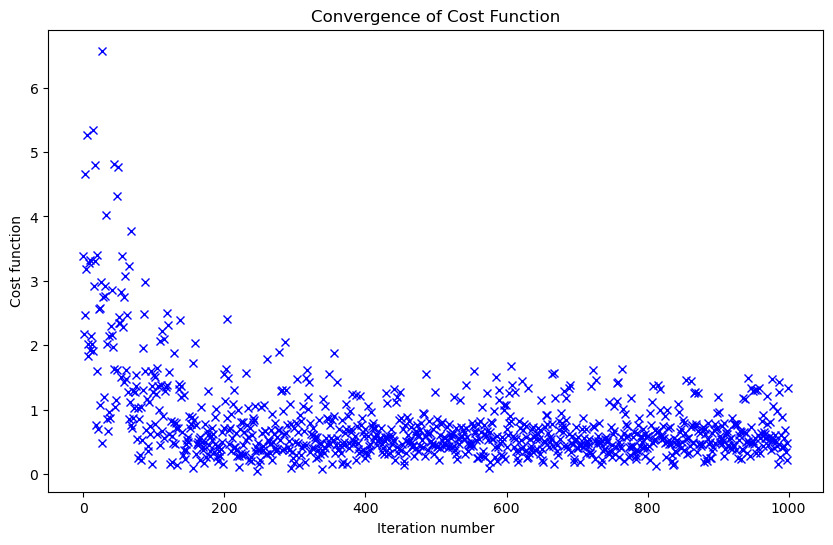

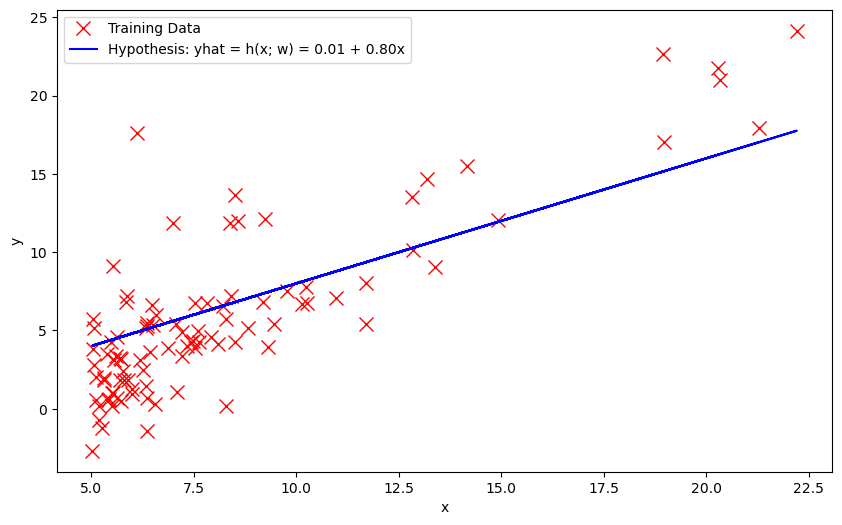

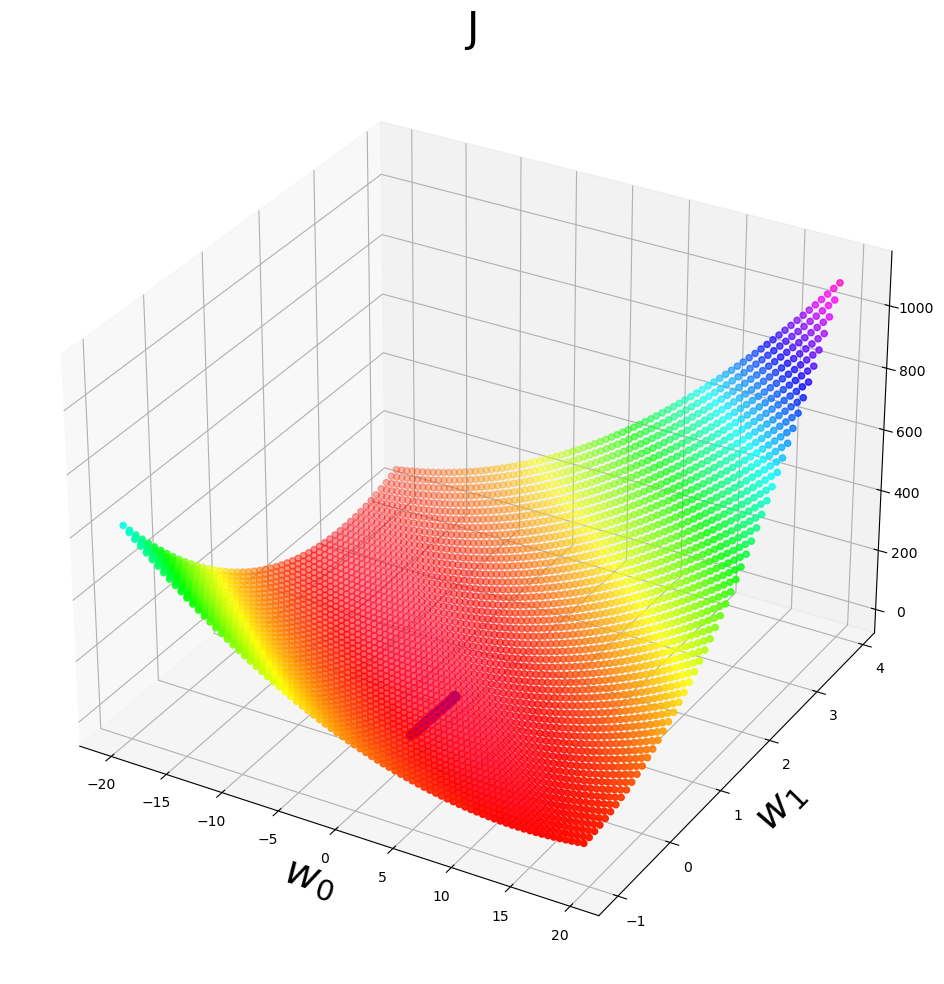

In [1276]:
iterations = 1000
alpha = 0.0001 # learning rate
batch_size = 10 # batch_size

w_start = np.zeros((X.shape[1], 1))
w, w_store, J_values = gradient_descend(X, y, batch_size, w_start)

plt.figure(figsize=(10,6))
plt.plot(range(len(J_values)),J_values,'bx')
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")


plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))

plt.ylabel('y')
plt.xlabel('x')
plt.legend()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection = '3d')
ax = fig.gca()

xvals = np.arange(-20,20,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for _ in xvals:
    for _k in yvals:
        myxs.append(_)
        myys.append(_k)
        myzs.append(mse(np.array([[_], [_k]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('gist_rainbow'))

plt.xlabel(r'$w_0$',fontsize=30)
plt.ylabel(r'$w_1$',fontsize=30)
plt.title('J',fontsize=30)
plt.plot([x[0] for x in w_store],[x[1] for x in w_store],J_values,'bo-')
plt.show()

C:\Users\calvi\AppData\Local\Temp\ipykernel_15496\2106477981.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))
C:\Users\calvi\AppData\Local\Temp\ipykernel_15496\1915227182.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))


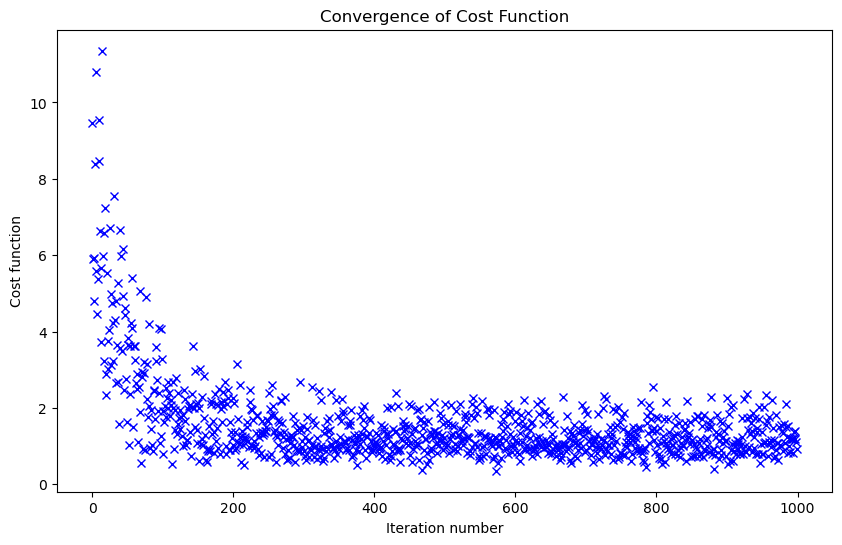

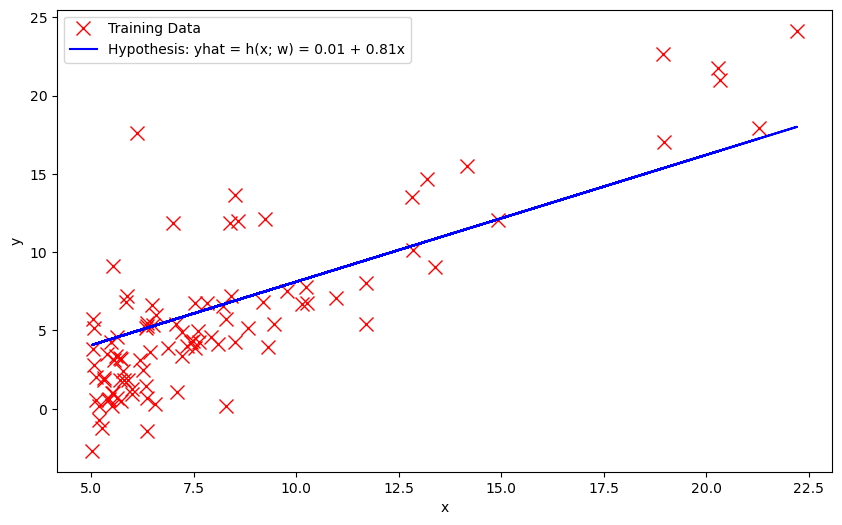

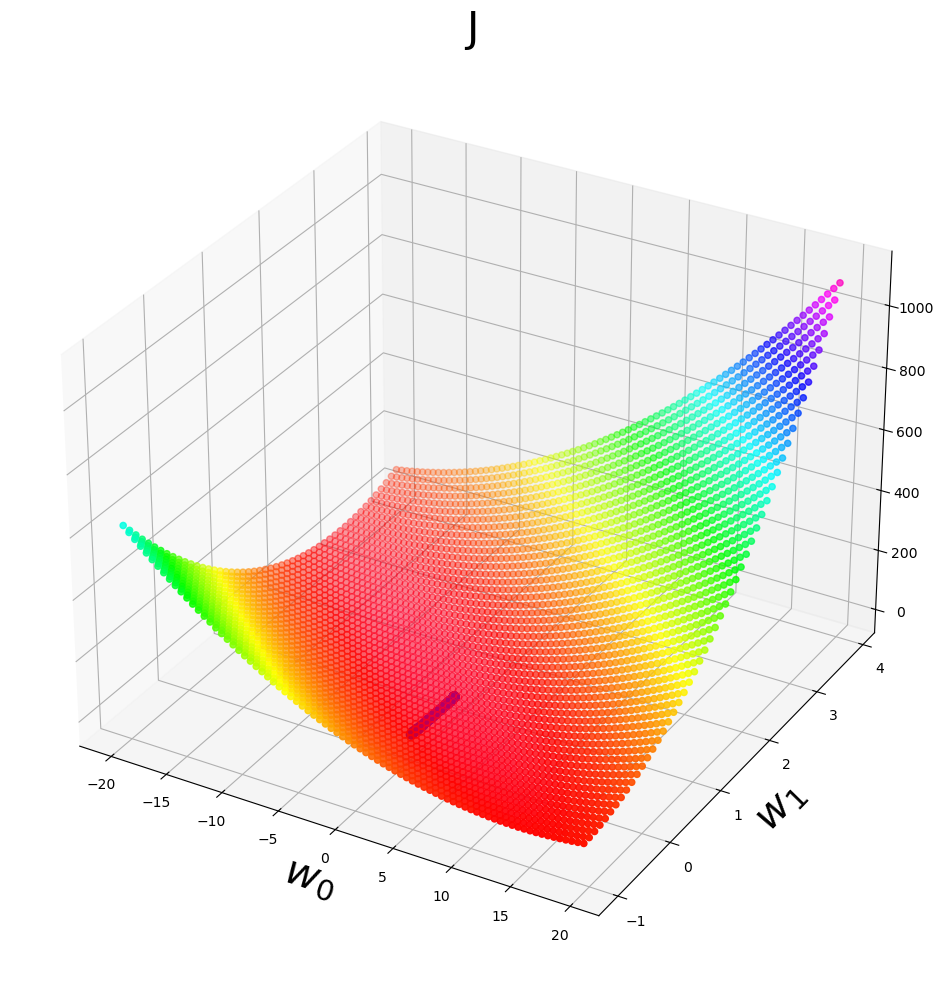

In [1277]:
iterations = 1000
alpha = 0.0001 # learning rate
batch_size = 20 # batch_size

w_start = np.zeros((X.shape[1], 1))
w, w_store, J_values = gradient_descend(X, y, batch_size, w_start)

plt.figure(figsize=(10,6))
plt.plot(range(len(J_values)),J_values,'bx')
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")


plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))

plt.ylabel('y')
plt.xlabel('x')
plt.legend()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection = '3d')
ax = fig.gca()

xvals = np.arange(-20,20,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for _ in xvals:
    for _k in yvals:
        myxs.append(_)
        myys.append(_k)
        myzs.append(mse(np.array([[_], [_k]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('gist_rainbow'))

plt.xlabel(r'$w_0$',fontsize=30)
plt.ylabel(r'$w_1$',fontsize=30)
plt.title('J',fontsize=30)
plt.plot([x[0] for x in w_store],[x[1] for x in w_store],J_values,'bo-')
plt.show()

C:\Users\calvi\AppData\Local\Temp\ipykernel_15496\2106477981.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))
C:\Users\calvi\AppData\Local\Temp\ipykernel_15496\2551850540.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))


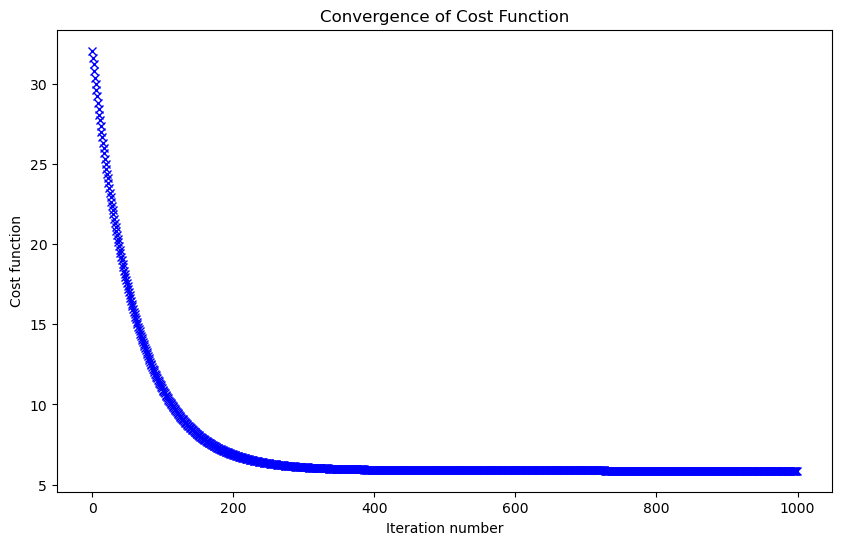

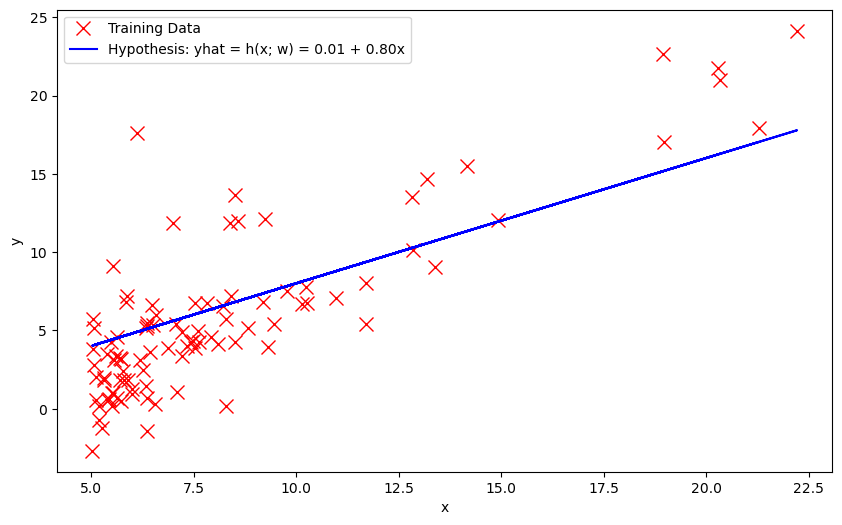

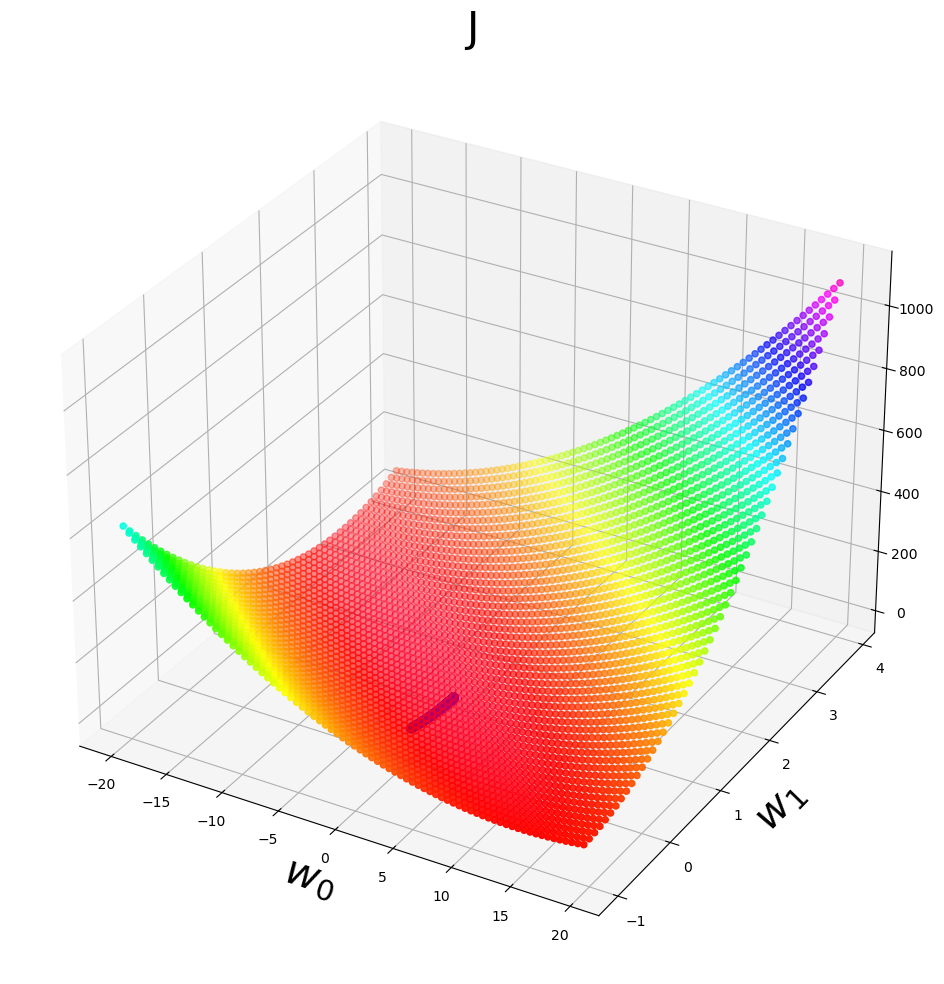

In [1278]:
iterations = 1000
alpha = 0.0001 # learning rate
batch_size = X.shape[0] # batch_size

w_start = np.zeros((X.shape[1], 1))
w, w_store, J_values = gradient_descend(X, y, batch_size, w_start)

plt.figure(figsize=(10,6))
plt.plot(range(len(J_values)),J_values,'bx')
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")


plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))

plt.ylabel('y')
plt.xlabel('x')
plt.legend()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection = '3d')
ax = fig.gca()

xvals = np.arange(-20,20,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for _ in xvals:
    for _k in yvals:
        myxs.append(_)
        myys.append(_k)
        myzs.append(mse(np.array([[_], [_k]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('gist_rainbow'))

plt.xlabel(r'$w_0$',fontsize=30)
plt.ylabel(r'$w_1$',fontsize=30)
plt.title('J',fontsize=30)
plt.plot([x[0] for x in w_store],[x[1] for x in w_store],J_values,'bo-')
plt.show()

In [1279]:
### Answer to Question 2

### When batch size is equal to the amount of data-points, it is the same as taking the whole data-set instead of applying
### mini-batches. This will mean that convergence should happen faster and will result in a better outcome compare to taking
### mini-batches of other different sizes.